In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Sample_for_AI (1) (1).csv")

In [3]:
df.head()

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,1,No,No,No,0.0,0,0.0,NaN,API
1,2,No,No,No,5.0,674,2.5,NaN,API
2,3,Yes,No,No,2.0,1532,2.0,Business Administration,Landing Page Submission
3,4,No,No,No,1.0,305,1.0,Media and Advertising,Landing Page Submission
4,5,Yes,No,No,2.0,1428,1.0,NaN,Landing Page Submission


In [4]:
#Basic Operations

In [5]:
df.size

83160

In [6]:
df.shape

(9240, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9240 non-null   int64  
 1   Purchased                    9240 non-null   object 
 2   Do Not Email                 9240 non-null   object 
 3   Do Not Call                  9240 non-null   object 
 4   TotalVisits                  9103 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9103 non-null   float64
 7   Specialization               5860 non-null   object 
 8   Origin                       9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


In [8]:
df.describe()

,ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,4620.500000,3.445238,487.698268,2.362820
std,2667.502577,4.854853,548.021466,2.161418
min,1.000000,0.000000,0.000000,0.000000
25%,2310.750000,1.000000,12.000000,1.000000
50%,4620.500000,3.000000,248.000000,2.000000
75%,6930.250000,5.000000,936.000000,3.000000
max,9240.000000,251.000000,2272.000000,55.000000


1.ID column has high cardinality,it will be not beneficial for our model to learn anything.

2.Total Visits are min 0 and max 251.

3.Max Total Time spent on website is 2272 i.e huge time spent on webiste can lead to purchase of product.

# EDA

In [9]:
#Check for null values
df.isna().sum()

ID                                0
Purchased                         0
Do Not Email                      0
Do Not Call                       0
TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Specialization                 3380
Origin                            0
dtype: int64

1.Total Visits,Page Views Per Visit & Specialization have null values,we'll need to impute them or drop them further.

In [10]:
df.columns

Index(['ID', 'Purchased', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'Origin'],
      dtype='object')

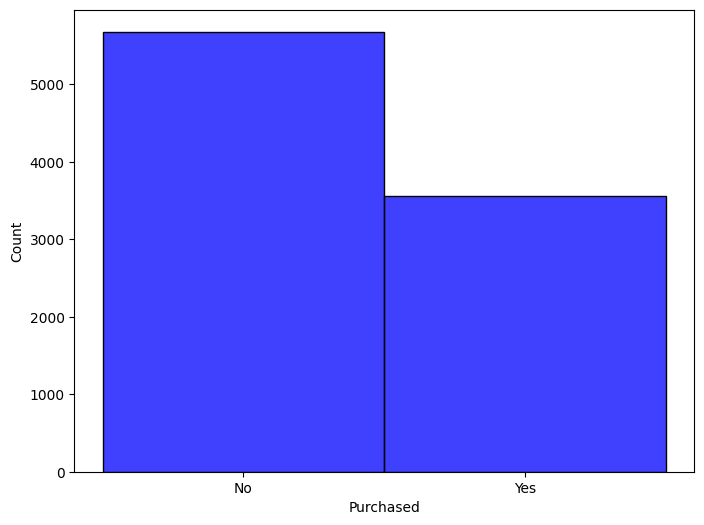

In [11]:
#Purcashed
plt.figure(figsize=(8,6))
sns.histplot(df['Purchased'],color="Blue")
plt.show()

1.More Data is of purchase not made we'll have to balance this dataset.

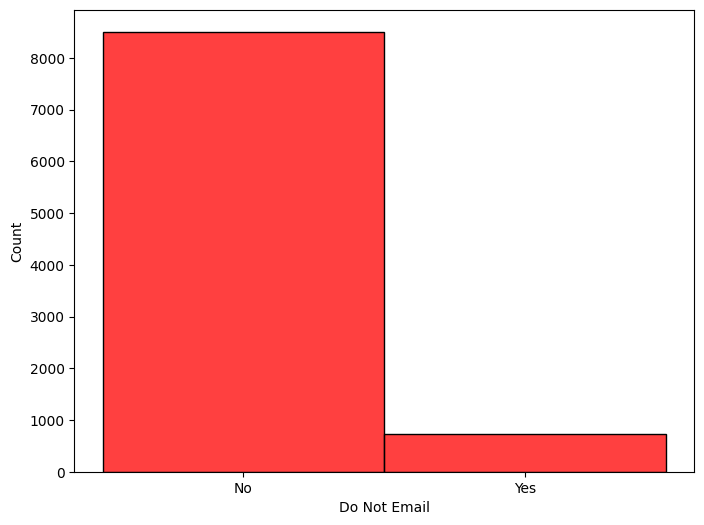

In [12]:
# Do Not Email
plt.figure(figsize=(8,6))
sns.histplot(df['Do Not Email'],color='red')
plt.show()

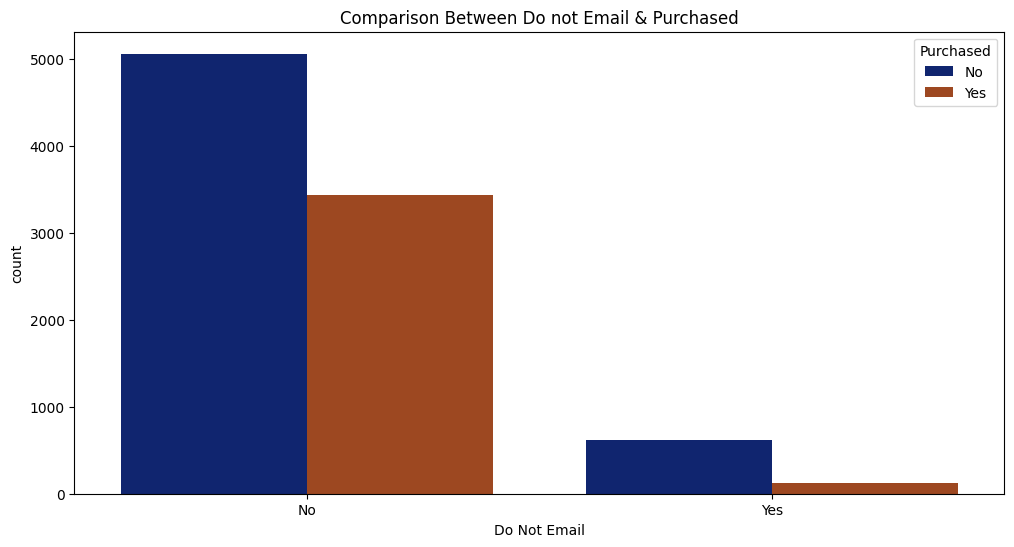

In [13]:
#Do not Email & Purchased
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Do Not Email', hue='Purchased',palette='dark')
plt.title("Comparison Between Do not Email & Purchased")
plt.show()

1.Some Amount of people who said No to mails have purchased.

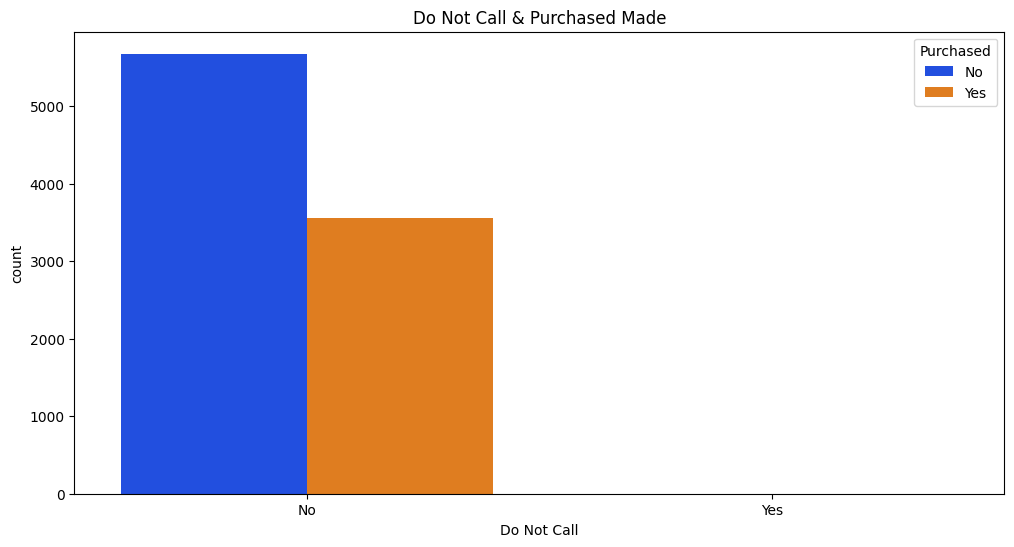

In [14]:
#Do Not Call & Purchased made
plt.figure(figsize=(12,6))
sns.countplot(data=df,x=df["Do Not Call"],hue="Purchased",palette="bright")
plt.title("Do Not Call & Purchased Made")
plt.show()

1.None of the people have opted for yes in do not call so it shows people are interested in trying out the purchase and know about it on a call.

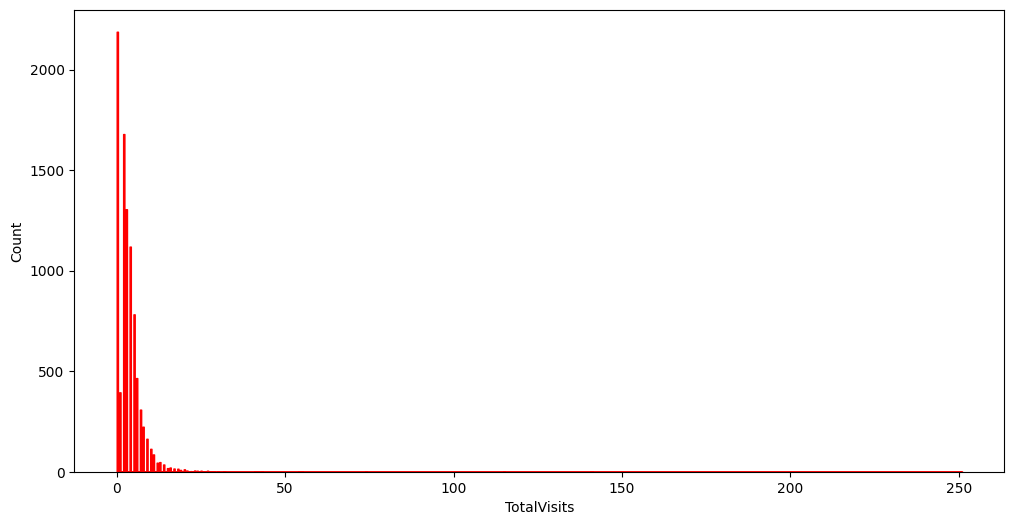

In [15]:
#TotalVisits
plt.figure(figsize=(12,6))
sns.histplot(data=df,x="TotalVisits",element="step",color="red")
plt.show()

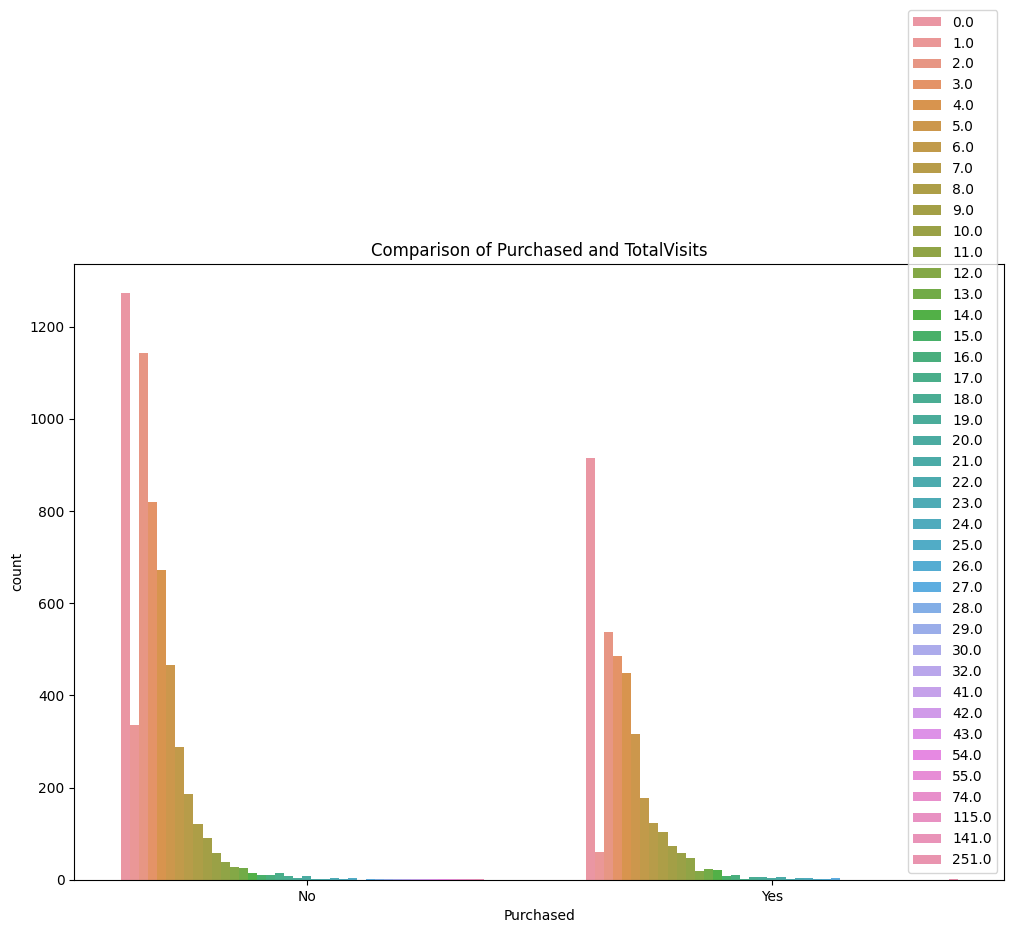

In [16]:
#Total visits VS purchased
plt.figure(figsize=(12,8))
sns.countplot(data=df,x=df["Purchased"],hue=df["TotalVisits"],)
plt.legend(loc="best")
plt.title('Comparison of Purchased and TotalVisits')
plt.show()

1.It can be clearly seen that total visits on website is not the best parameter to consider the purchase will be make or not,max total visits individual has not make the purchase its a clear example of that.

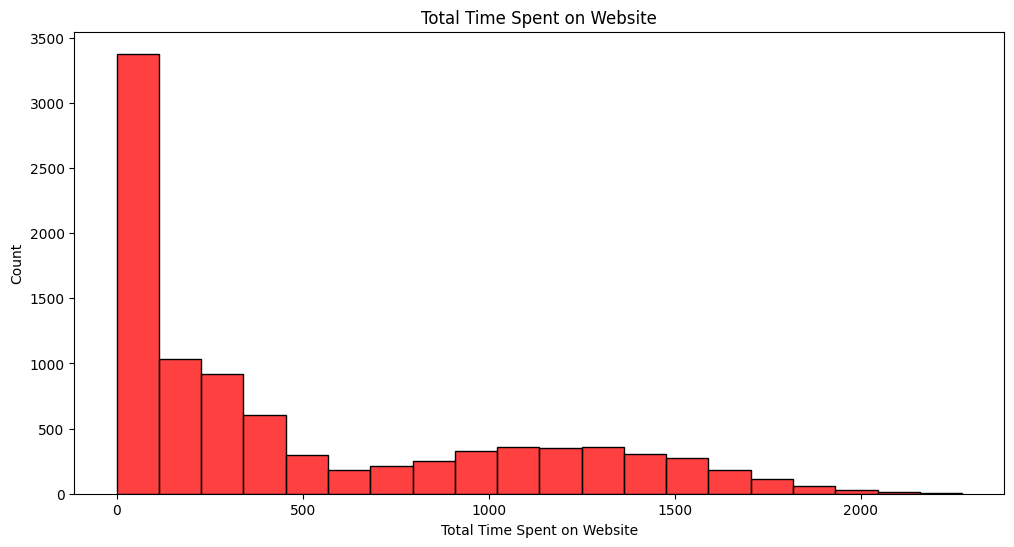

In [17]:
#Total Time Spent on Website
plt.figure(figsize=(12,6))
sns.histplot(df["Total Time Spent on Website"],bins=20,color="red")
plt.title("Total Time Spent on Website")
plt.show()

<Figure size 1200x600 with 0 Axes>

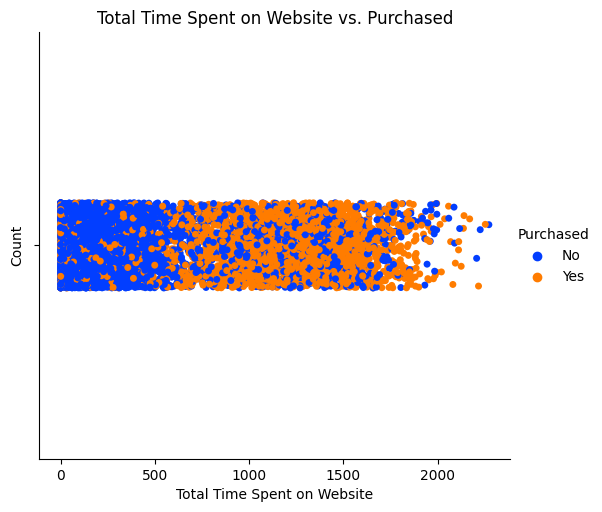

In [18]:
#Total Time Spent on Website VS Purchased
plt.figure(figsize=(12,6))
sns.catplot(data=df,x="Total Time Spent on Website",hue="Purchased",palette='bright')
plt.xlabel("Total Time Spent on Website")
plt.ylabel("Count")
plt.title("Total Time Spent on Website vs. Purchased")
plt.show()

1.people who spent less than 500 min on webiste are tend to make no purchase/less purchase.

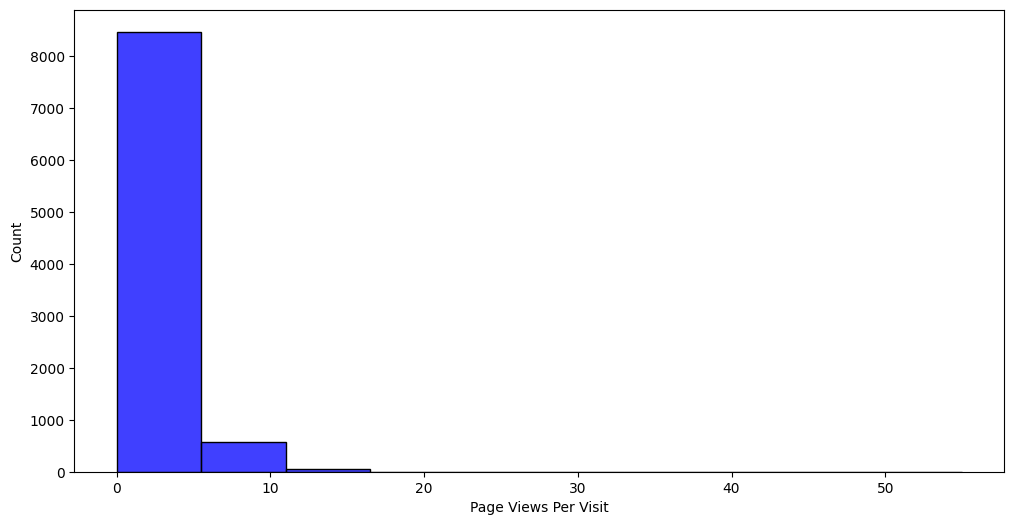

In [19]:
#Page Views Per Visit
plt.figure(figsize=(12,6))
sns.histplot(df["Page Views Per Visit"],bins=10,color="blue")
plt.show()

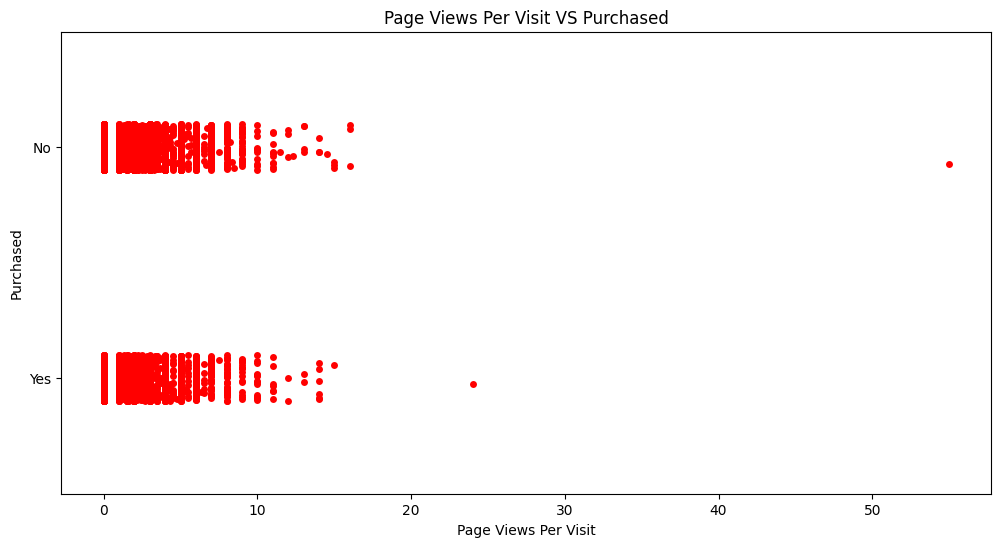

In [20]:
#Page Views Per Visit VS Purchased
plt.figure(figsize=(12,6))
sns.stripplot(data=df,x="Page Views Per Visit",y="Purchased",color="red")
plt.title("Page Views Per Visit VS Purchased")
plt.show()

1.Page Views per visit is somewhat equally distributed for Purchase made.

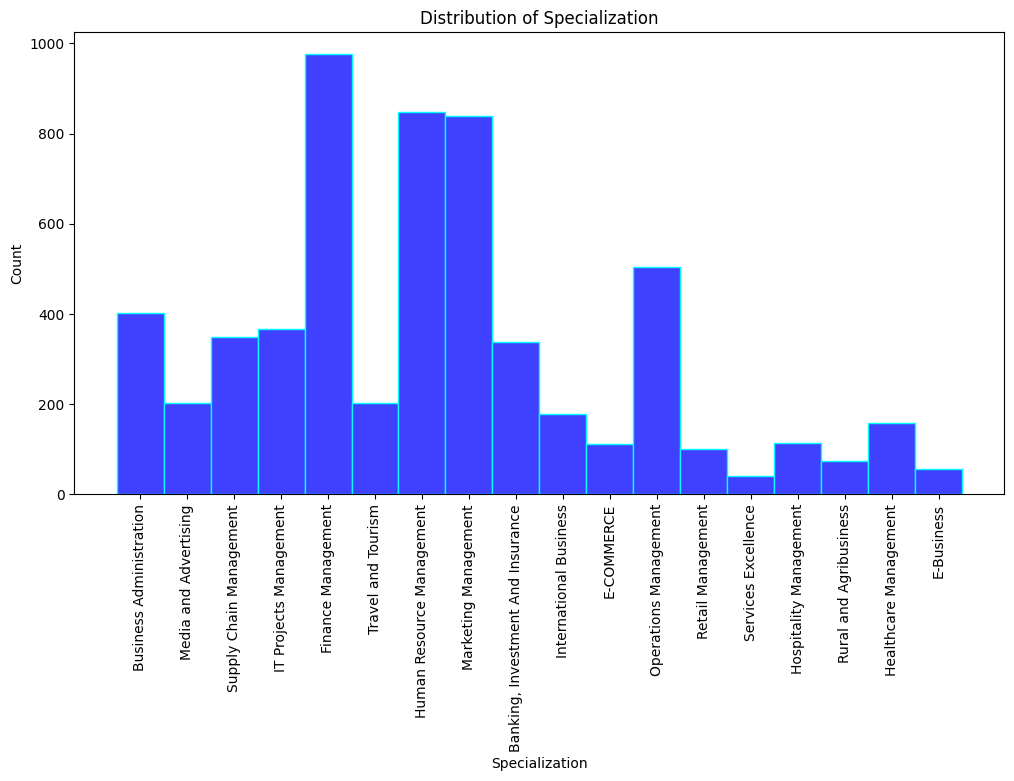

In [21]:
#Specialization
plt.figure(figsize=(12,6))
sns.histplot(df["Specialization"],color="Blue",edgecolor="cyan")
plt.xticks(rotation=90)
plt.xlabel("Specialization")
plt.ylabel("Count")
plt.title("Distribution of Specialization")
plt.show()

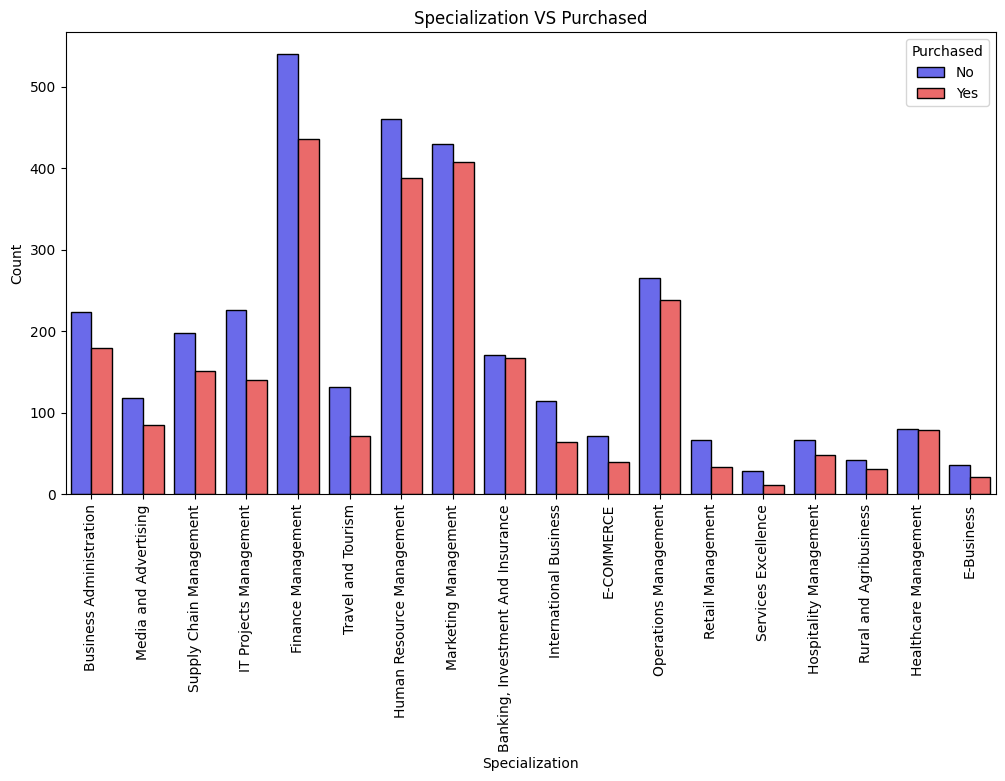

In [22]:
#Specialization VS Purchased
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="Specialization",hue="Purchased",palette="seismic",edgecolor="black")
plt.xticks(rotation=90)
plt.xlabel("Specialization")
plt.ylabel("Count")
plt.title("Specialization VS Purchased")
plt.show()

1.Top 3 Categories by whom purchases are made by are : i.Finanace Management ii.Marketing Management iii.Human Resource Management.

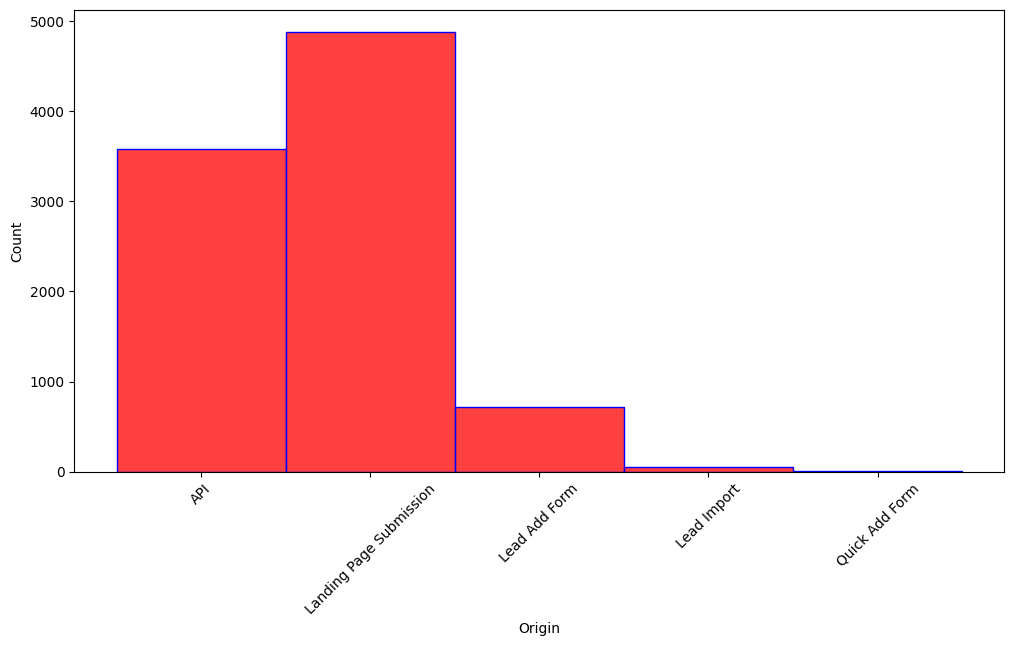

In [23]:
#Origin
plt.figure(figsize=(12,6))
sns.histplot(df["Origin"],color="red",edgecolor="blue")
plt.xticks(rotation=45)
plt.show()

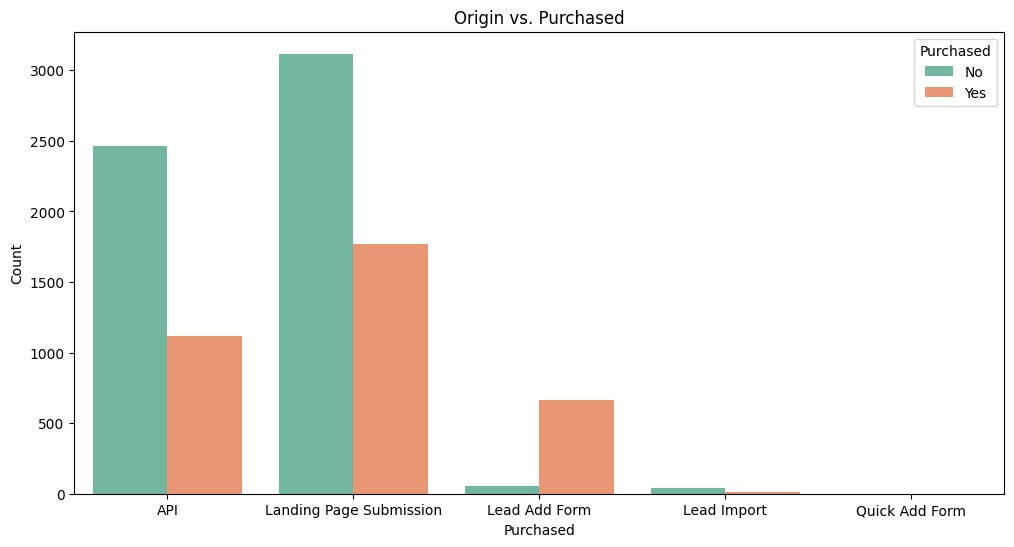

In [24]:
#Origin VS Purchased
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="Origin",hue="Purchased",palette="Set2")
plt.xlabel("Purchased")
plt.ylabel("Count")
plt.title("Origin vs. Purchased")
plt.show()

1.Most purchases are being made from Landing Page Submission followed by API,Lead Add Form Purchased,Lead Import.

2.The Purchase rate of Lead Add Form Purchased are is quite good as its not being purchased ratio is less in terms of purchase being made whereas for others the purchase not being made is higher.

# Observations:

 1.More Data is of purchase not made we'll have to balance this dataset.

2.Some Amount of people who said No to mails have purchased.



3.None of the people have opted for yes in do not call so it shows people are interested in trying out the purchase and know about it on a call.



4.It can be clearly seen that total visits on website is not the best parameter to consider the purchase will be make or not,max total visits individual has not make the purchase its a clear example of that.



5.people who spent less than 500 min on webiste are tend to make no purchase/less purchase.



6.Page Views per visit is somewhat equally distributed for Purchase made.



7.Top 3 Categories by whom purchases are made by are : i.Finanace Management ii.Marketing Management iii.Human Resource Management.

8.Most purchases are being made from Landing Page Submission followed by API,Lead Add Form Purchased,Lead Import.



9.The Purchase rate of Lead Add Form Purchased are is quite good as its not being purchased ratio is less in terms of purchase being made whereas for others the purchase not being made is higher.

# Data Preprocessing

## Handling Null Values:

In [25]:
df.isna().sum()

ID                                0
Purchased                         0
Do Not Email                      0
Do Not Call                       0
TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Specialization                 3380
Origin                            0
dtype: int64

During the EDA it can be seen that Page Views Per Visit & Specialization are not that leading feature which can predict purchase will be maked or not,Page Views per visit was equal for both purchase being made and not being made And for specialization for each specialization where there count is high for some but the ratio for purchase being made and not being made was not that different,it can be a parameter to learn but considering the null values in them it will be effective If we drop them.

In [26]:
#Dropping ID,Total Visits & Specialization Columns
df.drop(["ID","Page Views Per Visit","Specialization"],axis=1,inplace=True)

In [27]:
#Imputing null values in Total Visits 
df["TotalVisits"]=df["TotalVisits"].fillna(df["TotalVisits"].median())

In [28]:
df.isna().sum()

Purchased                      0
Do Not Email                   0
Do Not Call                    0
TotalVisits                    0
Total Time Spent on Website    0
Origin                         0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Purchased                    9240 non-null   object 
 1   Do Not Email                 9240 non-null   object 
 2   Do Not Call                  9240 non-null   object 
 3   TotalVisits                  9240 non-null   float64
 4   Total Time Spent on Website  9240 non-null   int64  
 5   Origin                       9240 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 433.2+ KB


In [30]:
df

,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Origin
0,No,No,No,0.0,0,API
1,No,No,No,5.0,674,API
2,Yes,No,No,2.0,1532,Landing Page Submission
3,No,No,No,1.0,305,Landing Page Submission
4,Yes,No,No,2.0,1428,Landing Page Submission
...,...,...,...,...,...,...
9235,Yes,Yes,No,8.0,1845,Landing Page Submission
9236,No,No,No,2.0,238,Landing Page Submission
9237,No,Yes,No,2.0,199,Landing Page Submission
9238,Yes,No,No,3.0,499,Landing Page Submission


## Encoding Categorical Columns:

In [31]:
cat_col=df.select_dtypes(include="object")
num_col=df.select_dtypes(include="int")

In [32]:
#Dropping Purchased For further simplicity
cat_col.drop("Purchased",axis=1,inplace=True)

In [33]:
cat_col.head()

,Do Not Email,Do Not Call,Origin
0,No,No,API
1,No,No,API
2,No,No,Landing Page Submission
3,No,No,Landing Page Submission
4,No,No,Landing Page Submission


In [34]:
num_col.head()

,Total Time Spent on Website
0,0
1,674
2,1532
3,305
4,1428


In [35]:
cat_df=pd.get_dummies(cat_col)

In [36]:
new_df=pd.concat([cat_df,num_col],axis=1)

In [37]:
new_df.head()

,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Origin_API,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Origin_Quick Add Form,Total Time Spent on Website
0,1,0,1,0,1,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,674
2,1,0,1,0,0,1,0,0,0,1532
3,1,0,1,0,0,1,0,0,0,305
4,1,0,1,0,0,1,0,0,0,1428


In [38]:
#Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_df=pd.DataFrame(sc.fit_transform(new_df),columns=new_df.columns)

In [39]:
scaled_df.head()

,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Origin_API,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Origin_Quick Add Form,Total Time Spent on Website
0,0.293755,-0.293755,0.014714,-0.014714,1.257380,-1.059333,-0.290263,-0.077382,-0.010404,-0.889974
1,0.293755,-0.293755,0.014714,-0.014714,1.257380,-1.059333,-0.290263,-0.077382,-0.010404,0.339972
2,0.293755,-0.293755,0.014714,-0.014714,-0.795304,0.943990,-0.290263,-0.077382,-0.010404,1.905689
3,0.293755,-0.293755,0.014714,-0.014714,-0.795304,0.943990,-0.290263,-0.077382,-0.010404,-0.333396
4,0.293755,-0.293755,0.014714,-0.014714,-0.795304,0.943990,-0.290263,-0.077382,-0.010404,1.715905


### Converting Target Column(Purchased) into Numeric

In [40]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
Purchased_enc=pd.DataFrame(enc.fit_transform(df["Purchased"]))

In [41]:
X=scaled_df
y=Purchased_enc

# Handling Purchased Column:

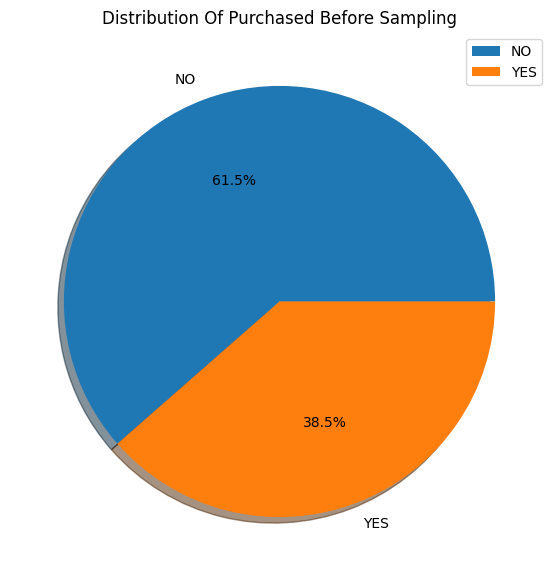

In [42]:
plt.figure(figsize=(7,7))
labels=["NO","YES"]
plt.pie(Purchased_enc.value_counts(),autopct="%.1f%%",labels=labels,shadow=True)
plt.title("Distribution Of Purchased Before Sampling")
plt.legend()
plt.show()

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [44]:
from imblearn.over_sampling import SMOTE
# Assuming you have one-hot encoded X_train and label encoded y_train
smote = SMOTE(random_state=42)
X,y=smote.fit_resample(X,y)

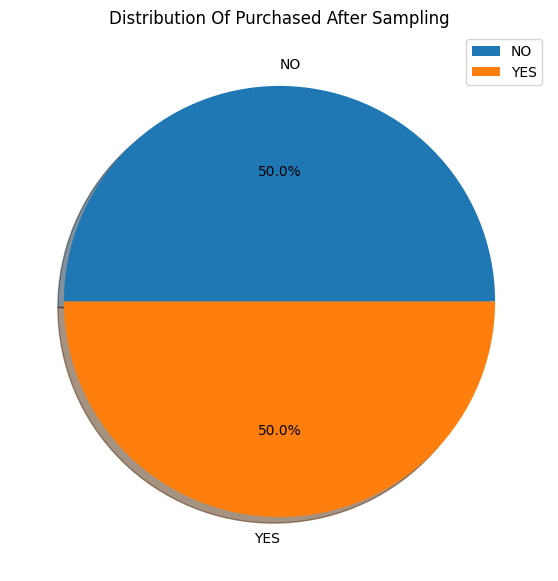

In [45]:
plt.figure(figsize=(7,7))
labels=["NO","YES"]
plt.pie(y.value_counts(),autopct="%.1f%%",labels=labels,shadow=True)
plt.title("Distribution Of Purchased After Sampling")
plt.legend()
plt.show()

In [46]:
print("X Shape: ",X.shape)
print("y Shape: ", y.shape)

X Shape:  (11358, 10)
y Shape:  (11358, 1)


# Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (9086, 10)
X_test:  (2272, 10)
y_train:  (9086, 1)
y_test:  (2272, 1)


# Model Building:


# 1.Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [49]:
#Accuracy on training dataset
print("Accuracy on training data : ",lr.score(X_train,y_train))
#Accuracy on testing dataset`
print("Accuracy on testing data : ",lr.score(X_test,y_test))

Accuracy on training data :  0.7717367378384328
Accuracy on testing data :  0.7874119718309859


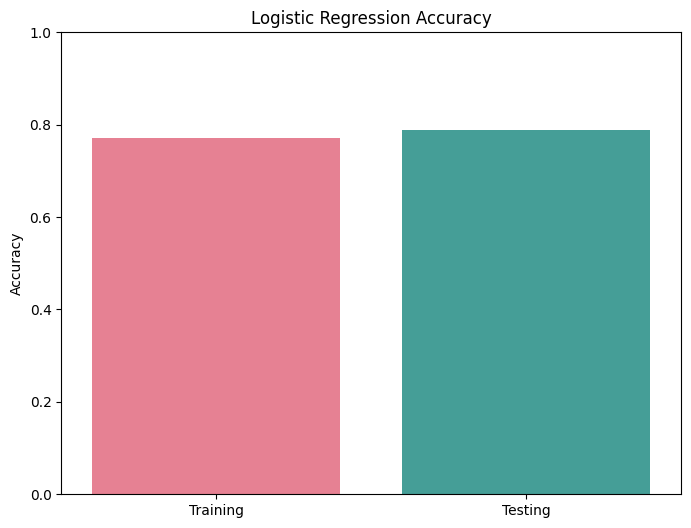

In [50]:
train_acc = lr.score(X_train, y_train)
test_acc = lr.score(X_test, y_test)

# plot the results
plt.figure(figsize=(8,6))
sns.barplot(x=['Training', 'Testing'], y=[train_acc, test_acc],palette="husl",)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy')
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
y_pred=lr.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("Precison: ",precision_score(y_test,y_pred))
print("F1-score: ", f1_score(y_test,y_pred))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))

confusion matrix:
 [[952 180]
 [303 837]]


Accuracy score: 0.7874119718309859
recall:  0.7342105263157894
Precison:  0.8230088495575221
F1-score:  0.7760778859527121
Specifity:  0.8409893992932862


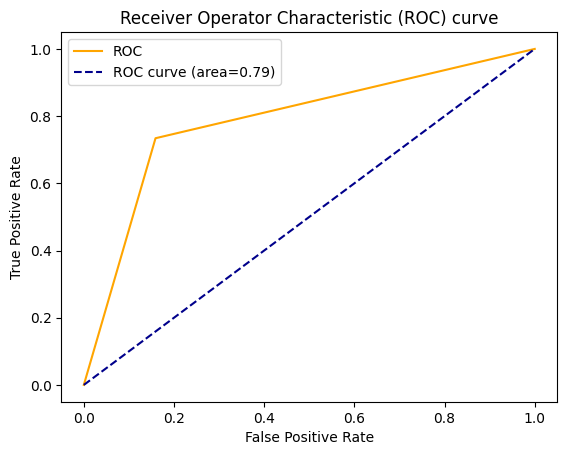

In [52]:
auc=roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred,)
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="ROC curve (area=%0.2f)" % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristic (ROC) curve")
plt.legend()
plt.show()

# 2.Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [54]:
#Accuracy on training dataset
print("Accuracy on training data : ",nb.score(X_train,y_train))
#Accuracy on testing dataset
print("Accuracy on testing data : ",nb.score(X_test,y_test))

Accuracy on training data :  0.5847457627118644
Accuracy on testing data :  0.5862676056338029


# 3.KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [56]:
#Accuracy on training dataset
print("Accuracy on training data : ",knn.score(X_train,y_train))
#Accuracy on testing dataset
print("Accuracy on testing data : ",knn.score(X_test,y_test))

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy on training data :  0.8047545674664319
Accuracy on testing data :  0.7658450704225352


D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

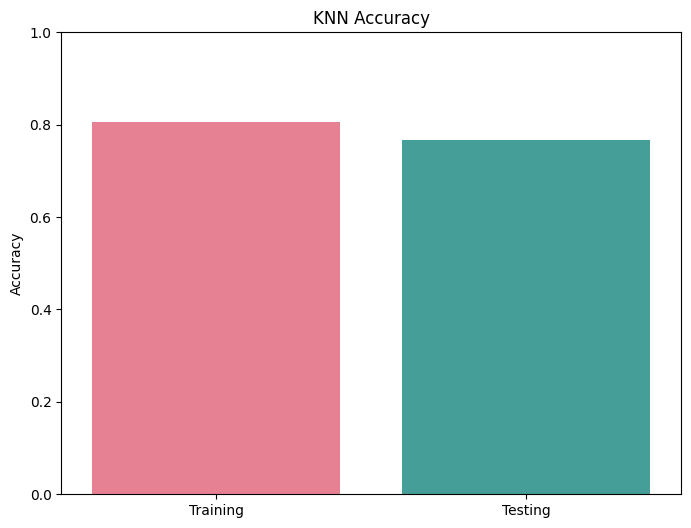

In [57]:
train_acc = knn.score(X_train, y_train)
test_acc = knn.score(X_test, y_test)

# plot the results
plt.figure(figsize=(8,6))
sns.barplot(x=['Training', 'Testing'], y=[train_acc, test_acc],palette="husl",)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.show()

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


confusion matrix:
 [[896 236]
 [296 844]]
Accuracy score: 0.7658450704225352
recall:  0.7403508771929824
Precison:  0.7814814814814814
F1-score:  0.7603603603603604
Specifity:  0.7915194346289752


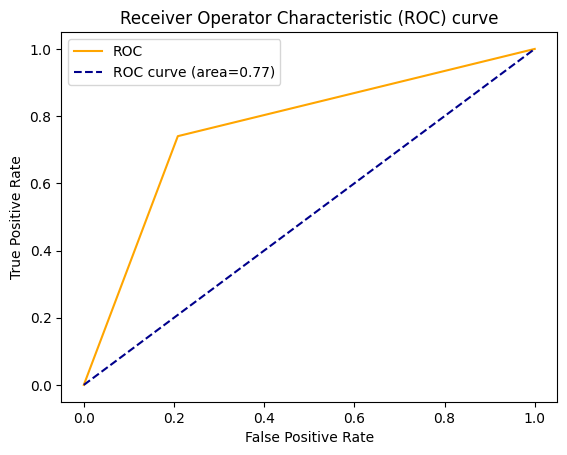

In [58]:
y_pred=knn.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))

print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("Precison: ",precision_score(y_test,y_pred))
print("F1-score: ", f1_score(y_test,y_pred))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))
auc=roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="ROC curve (area=%0.2f)" % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristic (ROC) curve")
plt.legend()
plt.show()

# 4.SVM

In [59]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [60]:
#Accuracy on training dataset
print("Accuracy on training data : ",svm.score(X_train,y_train))
#Accuracy on testing dataset
print("Accuracy on testing data : ",svm.score(X_test,y_test))

Accuracy on training data :  0.7710763812458727
Accuracy on testing data :  0.7878521126760564


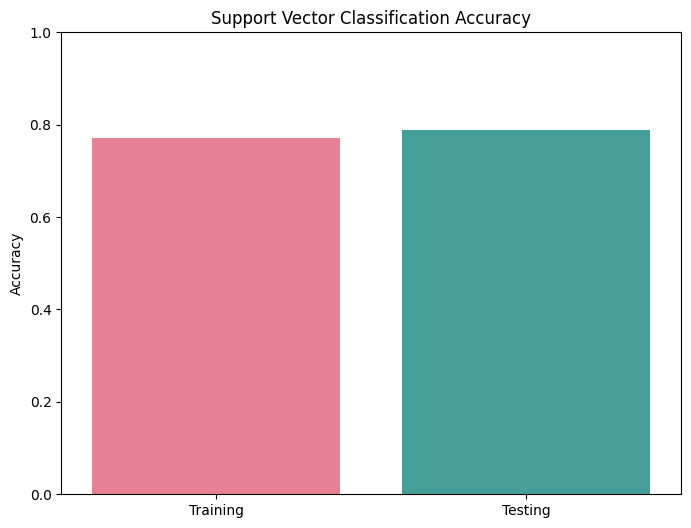

In [61]:
train_acc = svm.score(X_train, y_train)
test_acc = svm.score(X_test, y_test)

# plot the results
plt.figure(figsize=(8,6))
sns.barplot(x=['Training', 'Testing'], y=[train_acc, test_acc],palette="husl",)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Support Vector Classification Accuracy')
plt.show()

confusion matrix:
 [[963 169]
 [313 827]]
Accuracy score: 0.7878521126760564
recall:  0.7254385964912281
Precison:  0.8303212851405622
F1-score:  0.7743445692883896
Specifity:  0.8507067137809188


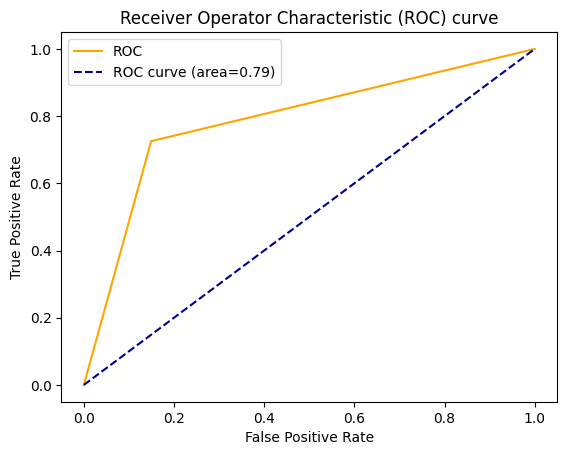

In [62]:
y_pred=svm.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))

print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("Precison: ",precision_score(y_test,y_pred))
print("F1-score: ", f1_score(y_test,y_pred))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))
auc=roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="ROC curve (area=%0.2f)" % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristic (ROC) curve")
plt.legend()
plt.show()

# 5.Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

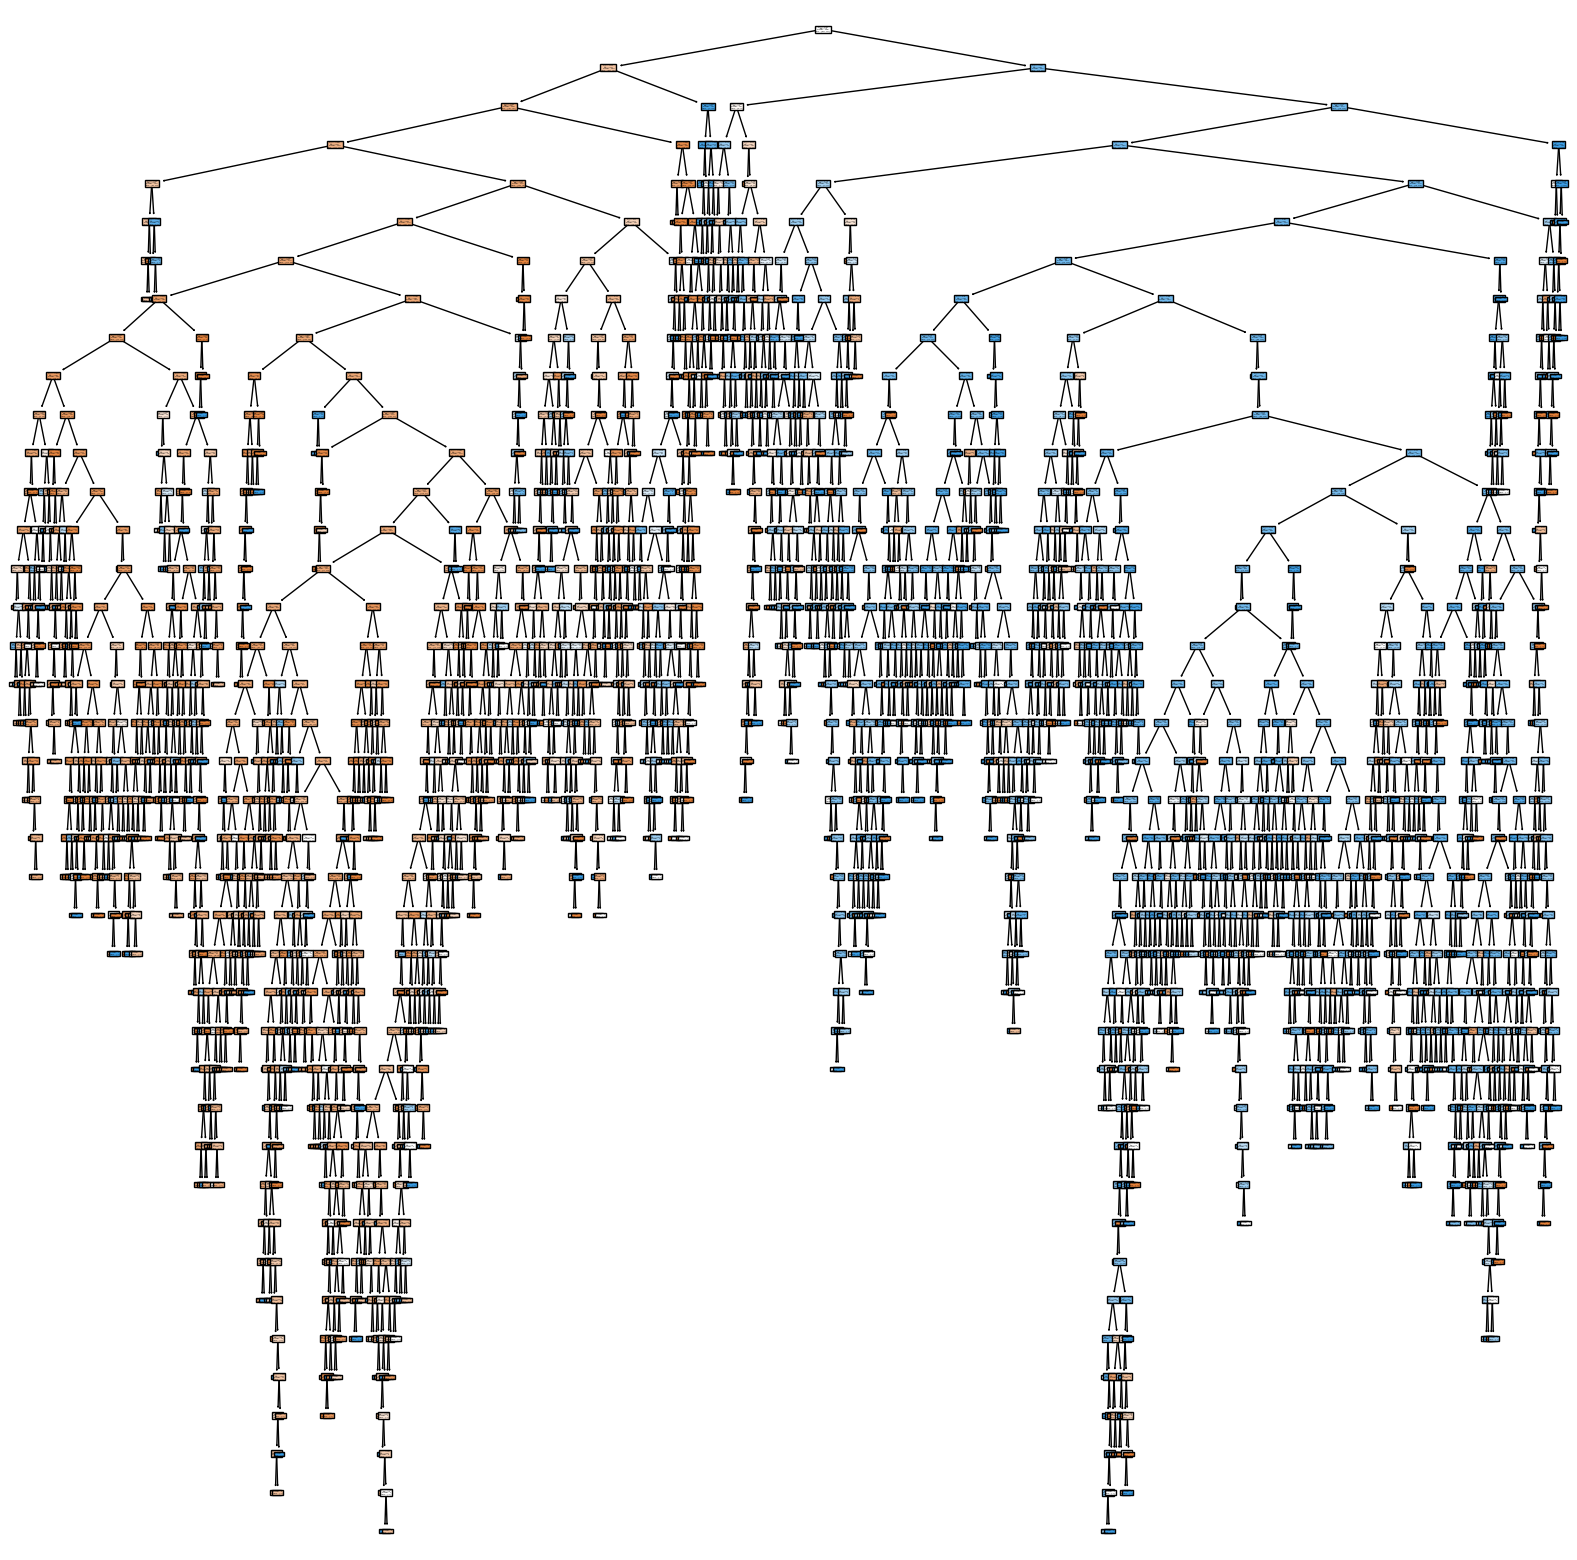

In [64]:
#Visualizing Tree
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt.fit(X_train,y_train),filled=True)
plt.show()

In [65]:
#Accuracy on training dataset
print("Accuracy on training data : ",dt.score(X_train,y_train))
#Accuracy on testing dataset
print("Accuracy on testing data : ",dt.score(X_test,y_test))

Accuracy on training data :  0.864076601364737
Accuracy on testing data :  0.733274647887324


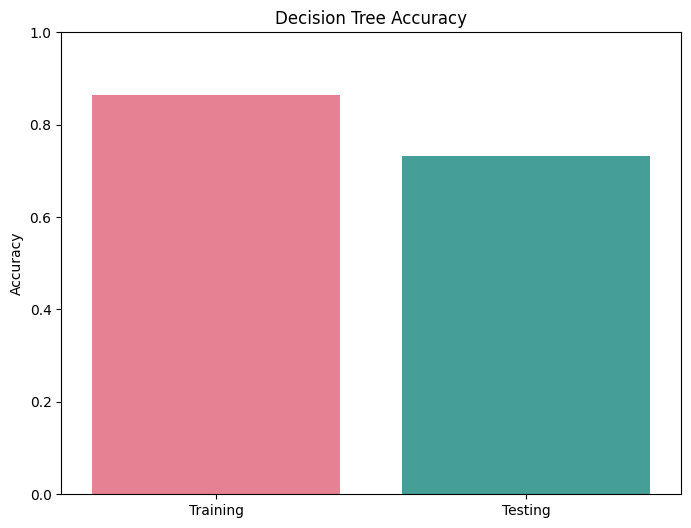

In [66]:
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)

# plot the results
plt.figure(figsize=(8,6))
sns.barplot(x=['Training', 'Testing'], y=[train_acc, test_acc],palette="husl",)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy')
plt.show()

confusion matrix:
 [[927 205]
 [401 739]]
Accuracy score: 0.733274647887324
recall:  0.6482456140350877
Precison:  0.7828389830508474
F1-score:  0.7092130518234165
Specifity:  0.818904593639576


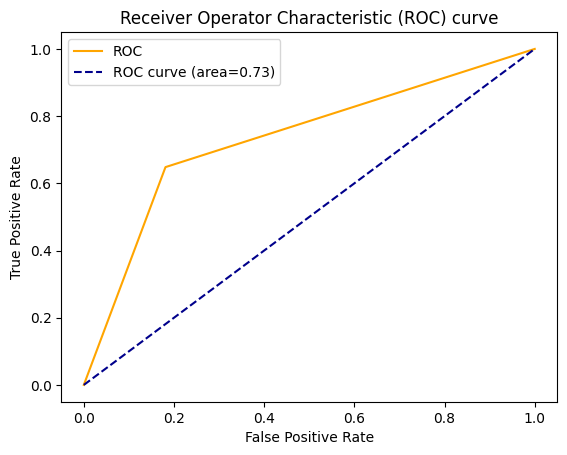

In [67]:
y_pred=dt.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))

print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("Precison: ",precision_score(y_test,y_pred))
print("F1-score: ", f1_score(y_test,y_pred))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))
auc=roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="ROC curve (area=%0.2f)" % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristic (ROC) curve")
plt.legend()
plt.show()

# 6.Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_5896\4088512485.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier()

In [69]:
#Accuracy on training dataset
print("Accuracy on training data : ",rf.score(X_train,y_train))
#Accuracy on testing dataset
print("Accuracy on testing data : ",rf.score(X_test,y_test))

Accuracy on training data :  0.8639665419326437
Accuracy on testing data :  0.75


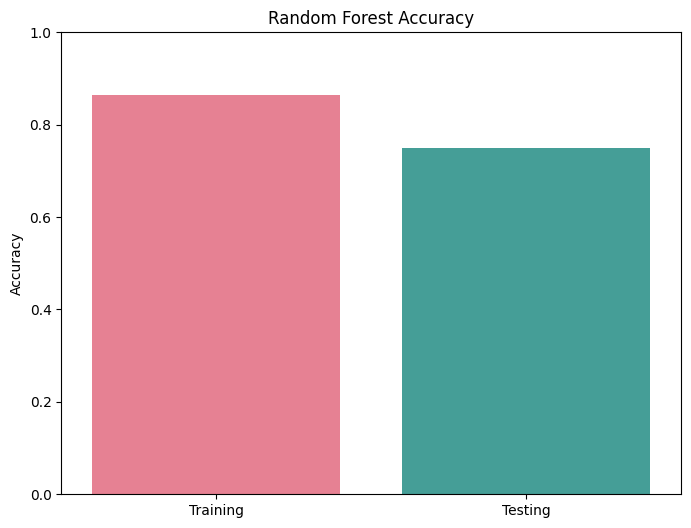

In [70]:
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)

# plot the results
plt.figure(figsize=(8,6))
sns.barplot(x=['Training', 'Testing'], y=[train_acc, test_acc],palette="husl",)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()

confusion matrix:
 [[897 235]
 [333 807]]
Accuracy score: 0.75
recall:  0.7078947368421052
Precison:  0.77447216890595
F1-score:  0.7396883593033913
Specifity:  0.7924028268551236


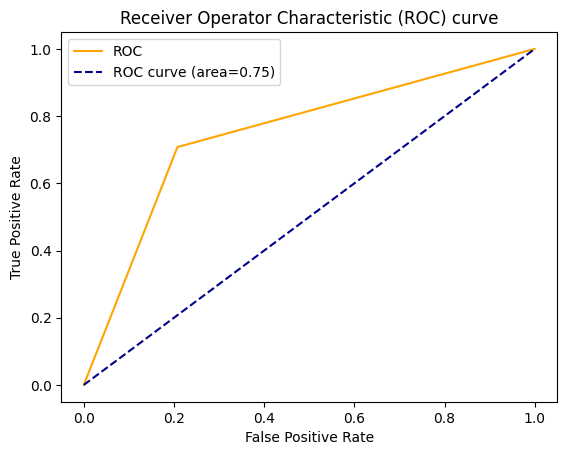

In [71]:
y_pred=rf.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))

print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("Precison: ",precision_score(y_test,y_pred))
print("F1-score: ", f1_score(y_test,y_pred))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))
auc=roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="ROC curve (area=%0.2f)" % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristic (ROC) curve")
plt.legend()
plt.show()

*By comparing all the above-used models, logistic regression appears to be the best-fitted model, as there is no significant difference between its training and testing accuracies compared to the other models. While the accuracies of other models on the training set may be higher than logistic regression, the dataset performs better on the testing set using logistic regression.*

*Therefore, my best-fitted model would be logistic regression.*

# Hyperparameter tuning Of Logistic regression

In [81]:
from sklearn.model_selection import GridSearchCV
model=LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],               
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   
    'fit_intercept': [True, False],        
    'class_weight': [None, 'balanced'],   
    'solver': ['liblinear', 'saga'],       
    'max_iter': [100, 200, 300]            
}

In [73]:
grid_search=GridSearchCV(model,param_grid)
grid_search.fit(X_train,y_train)

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\li

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was 

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [74]:
grid_search.best_params_

{'C': 0.001,
 'class_weight': None,
 'fit_intercept': False,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [75]:
model1=LogisticRegression(C=0.001,
 class_weight= None,
 fit_intercept= False,
 max_iter=100,
 penalty='l2',
 solver='liblinear')

In [76]:
model1.fit(X_train,y_train)

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001, fit_intercept=False, solver='liblinear')

In [77]:
#Accuracy on training dataset
print("Accuracy on training data : ",model1.score(X_train,y_train))
#Accuracy on testing dataset
print("Accuracy on testing data : ",model1.score(X_test,y_test))

Accuracy on training data :  0.7740479859123927
Accuracy on testing data :  0.7918133802816901


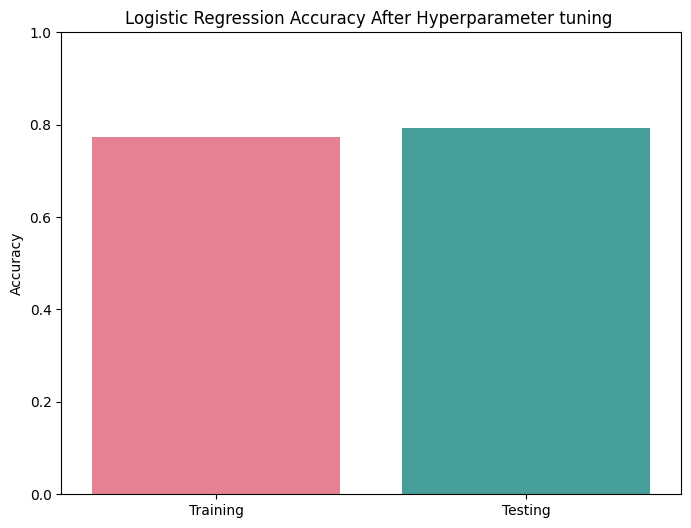

In [78]:
train_acc = model1.score(X_train, y_train)
test_acc = model1.score(X_test, y_test)

# plot the results
plt.figure(figsize=(8,6))
sns.barplot(x=['Training', 'Testing'], y=[train_acc, test_acc],palette="husl",)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy After Hyperparameter tuning ')
plt.show()

confusion matrix:
 [[944 188]
 [285 855]]
Accuracy score: 0.7918133802816901
recall:  0.75
Precison:  0.8197507190795782
F1-score:  0.783325698579936
Specifity:  0.833922261484099


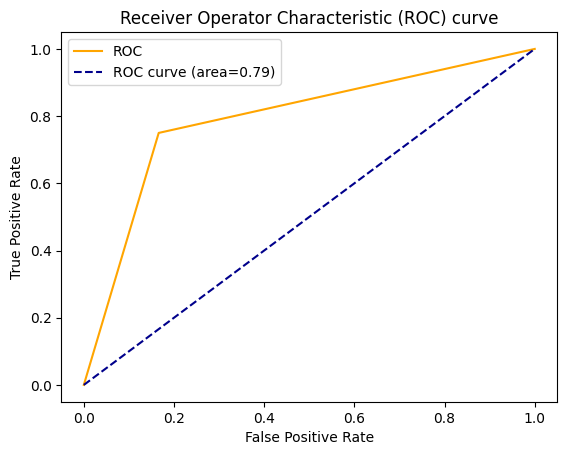

In [79]:
y_pred=model1.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))

print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("Precison: ",precision_score(y_test,y_pred))
print("F1-score: ", f1_score(y_test,y_pred))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))
auc=roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="ROC curve (area=%0.2f)" % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristic (ROC) curve")
plt.legend()
plt.show()

### Saving the Model

In [80]:
from joblib import dump,load
dump(model1,"Purchase_Prediction.joblib")

['Purchase_Prediction.joblib']

### RESULTS:


1.Several models have been used for model making including Logistic Regression,Naive Bayes,KNN,Support Vector Machines,Decision Tree,Random Forest the thing is all models have shown good accuracy except Naive Bayes.


2.Logistic regression outperformed other models, demonstrating higher accuracy. Hyperparameter tuning further improved the model's performance,training accuracy remaining same from 77% while achieving an increase in testing accuracy from 78% to 79%.

3.SVM demonstrates comparable accuracy to logistic regression, making it another viable option. However, to make informed business decisions that prioritize specificity, it is essential to involve domain-specific experts who can evaluate metrics such as recall, specificity, and F1 score. By carefully considering the specific needs of the business, the appropriate model can be selected accordingly.